In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\ACER PC\Dropbox\My PC (LAPTOP-83BUHU5P)\Downloads\customer_support_tickets.csv\customer_support_tickets.csv")
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


### columns information 

In [3]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, explorative=True)

# profile.to_file("Customer_Supports.html")

# # Display report in Jupyter Notebook (if using Jupyter)
# profile.to_notebook_iframe()

# Exploratory Data Analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [5]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [6]:
df['Resolution'] = df['Resolution'].fillna(
    df['Ticket Status'].apply(lambda x: 'Pending Resolution' if x != 'Closed' else 'No resolution provided')
)
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Pending Resolution,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Pending Resolution,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Pending Resolution,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Pending Resolution,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [7]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Pending Resolution,Critical,Social media,2023-06-01 12:15:36,NaT,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Pending Resolution,Critical,Chat,2023-06-01 16:45:38,NaT,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Pending Resolution,Low,Phone,NaT,NaT,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Pending Resolution,Critical,Email,NaT,NaT,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [8]:
df['First Response Time'] = df['First Response Time'].fillna(
    df[df['Ticket Status'] == 'Closed']['First Response Time'].median()
)

df['Time to Resolution'] = df['Time to Resolution'].fillna(
    df[df['Ticket Status'] == 'Closed']['Time to Resolution'].median()
)
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Pending Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Pending Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Pending Resolution,Low,Phone,2023-06-01 11:22:02,2023-06-01 11:17:48,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Pending Resolution,Critical,Email,2023-06-01 11:22:02,2023-06-01 11:17:48,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [9]:
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna(
   df['Customer Satisfaction Rating'].median()
)
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Pending Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,3.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Pending Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,3.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Pending Resolution,Low,Phone,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Pending Resolution,Critical,Email,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [10]:
df.isnull().sum()

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

In [11]:
df['Ticket Priority'].value_counts()

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

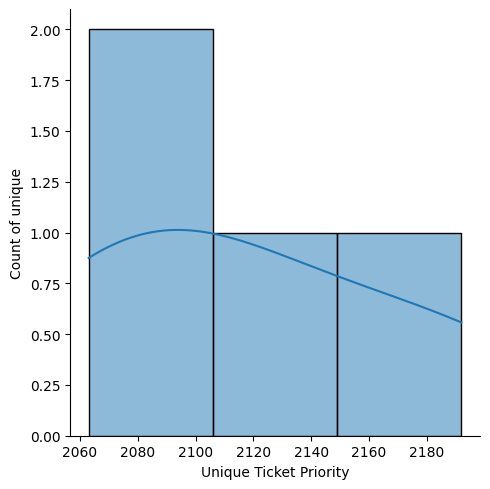

In [12]:
count = df['Ticket Priority'].value_counts()
plt.figure(figsize=(10,6))
sns.displot(count,kde = True)
plt.xlabel("Unique Ticket Priority")
plt.ylabel("Count of unique")
plt.show()

### How does Customer Age vary across different Ticket Types?

C:\Users\ACER PC\AppData\Local\Temp\ipykernel_12656\2244423586.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ticket Type', y='Customer Age', data=df, palette='Set2')


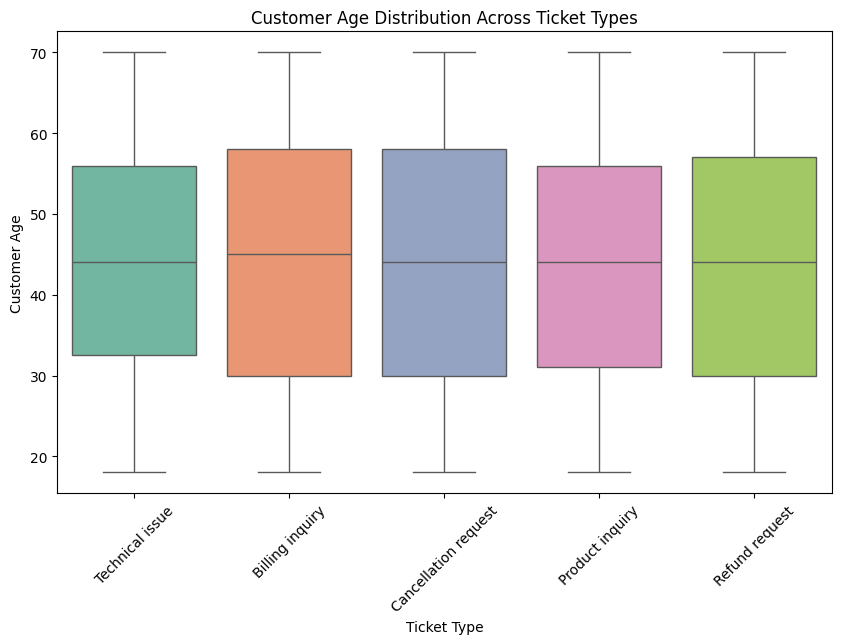

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Ticket Type', y='Customer Age', data=df, palette='Set2')

plt.xlabel('Ticket Type')
plt.ylabel('Customer Age')
plt.title('Customer Age Distribution Across Ticket Types')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


### Which Ticket Channel is used most frequently?

In [14]:
df['Ticket Channel'].mode()

0    Email
Name: Ticket Channel, dtype: object

C:\Users\ACER PC\AppData\Local\Temp\ipykernel_12656\4275792589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='Blues_r')


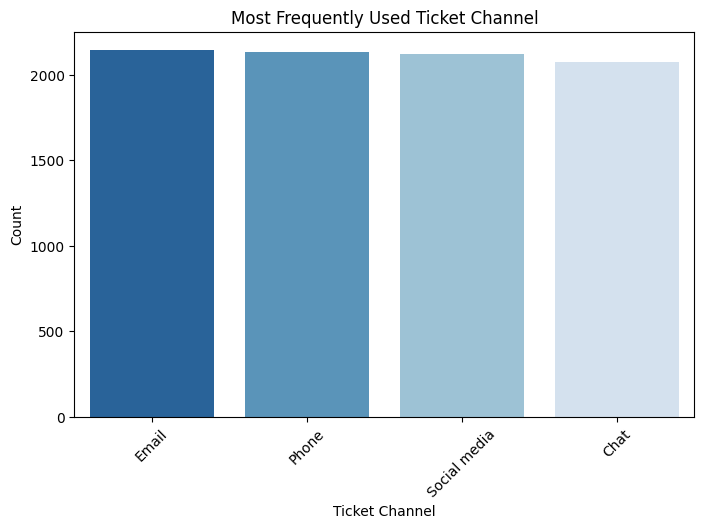

Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each ticket channel
channel_counts = df['Ticket Channel'].value_counts()

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='Blues_r')

plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.title('Most Frequently Used Ticket Channel')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()
channel_counts


### What are the most common Ticket Subjects?

C:\Users\ACER PC\AppData\Local\Temp\ipykernel_12656\3755707548.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_counts.index, y=sub_counts.values, palette='Blues_r')


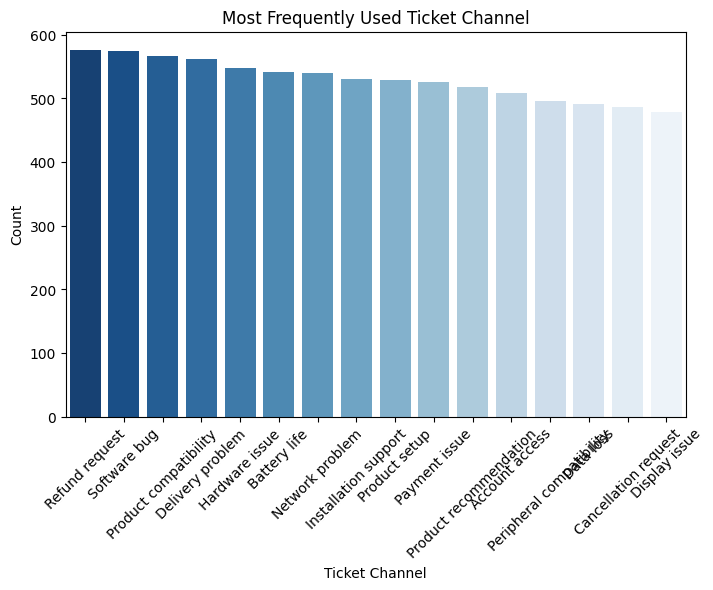

Ticket Subject
Refund request              576
Software bug                574
Product compatibility       567
Delivery problem            561
Hardware issue              547
Battery life                542
Network problem             539
Installation support        530
Product setup               529
Payment issue               526
Product recommendation      517
Account access              509
Peripheral compatibility    496
Data loss                   491
Cancellation request        487
Display issue               478
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each ticket channel
sub_counts = df['Ticket Subject'].value_counts()

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sub_counts.index, y=sub_counts.values, palette='Blues_r')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.title('Most Frequently Used Ticket Channel')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()
sub_counts


### Is there a correlation between Customer Age and Ticket Type?

In [17]:
from scipy.stats import f_oneway

# Extract Customer Age for each Ticket Type
groups = [df[df['Ticket Type'] == t]['Customer Age'] for t in df['Ticket Type'].unique()]

# Perform ANOVA test
stat, p_value = f_oneway(*groups)

print(f"ANOVA p-value: {p_value}")
if p_value < 0.05:
    print("Significant relationship between Customer Age and Ticket Type.")
else:
    print("No significant relationship between Customer Age and Ticket Type.")


ANOVA p-value: 0.9118377524519116
No significant relationship between Customer Age and Ticket Type.


#### How does First Response Time vary by Ticket Priority?

In [18]:
# from scipy.stats import f_oneway

# # Extract response times for each priority level
# groups = [df[df['Ticket Priority'] == p]['First Response Time'] for p in df['Ticket Priority'].unique()]

# # Perform ANOVA test
# stat, p_value = f_oneway(*groups)

# print(f"ANOVA p-value: {p_value}")
# if p_value < 0.05:
#     print("Significant differences in First Response Time across Ticket Priorities.")
# else:
#     print("No significant differences in First Response Time across Ticket Priorities.")


### What is the distribution of Customer Satisfaction Ratings?

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   object        
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   object        
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   object        
 11  Resolution                    

C:\Users\ACER PC\AppData\Local\Temp\ipykernel_12656\3614376495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Satisfaction Rating', data=df, palette='YlGnBu')


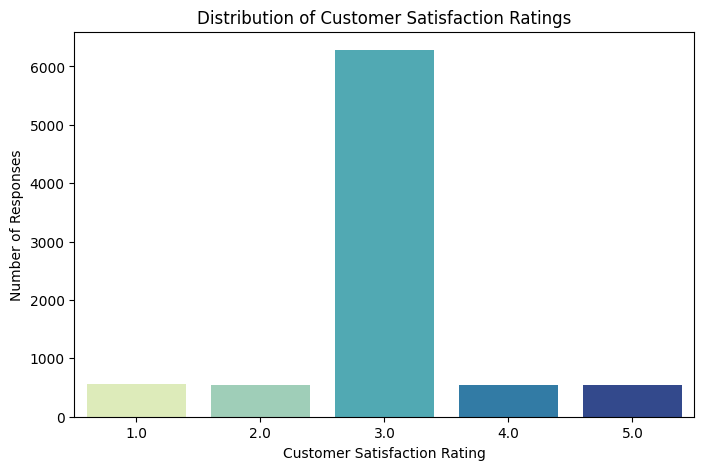

In [20]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Satisfaction Rating', data=df, palette='YlGnBu')

plt.xlabel('Customer Satisfaction Rating')
plt.ylabel('Number of Responses')
plt.title('Distribution of Customer Satisfaction Ratings')
plt.show()


In [21]:
df1 = pd.read_csv(r"C:\Users\ACER PC\Dropbox\My PC (LAPTOP-83BUHU5P)\Downloads\customer_support_tickets.csv\customer_support_tickets.csv")

C:\Users\ACER PC\AppData\Local\Temp\ipykernel_12656\1222755624.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Satisfaction Rating', data=df1, palette='YlGnBu')


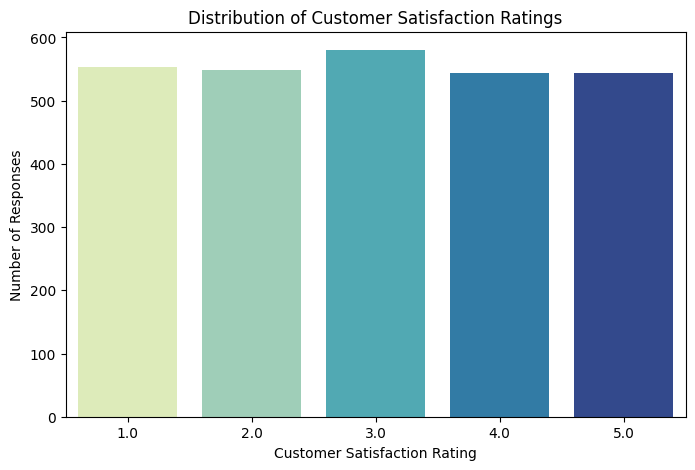

In [22]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Satisfaction Rating', data=df1, palette='YlGnBu')

plt.xlabel('Customer Satisfaction Rating')
plt.ylabel('Number of Responses')
plt.title('Distribution of Customer Satisfaction Ratings')
plt.show()


In [23]:
df1.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [24]:
df[df['Ticket Status'] == 'Open'].count()

Ticket ID                       2819
Customer Name                   2819
Customer Email                  2819
Customer Age                    2819
Customer Gender                 2819
Product Purchased               2819
Date of Purchase                2819
Ticket Type                     2819
Ticket Subject                  2819
Ticket Description              2819
Ticket Status                   2819
Resolution                      2819
Ticket Priority                 2819
Ticket Channel                  2819
First Response Time             2819
Time to Resolution              2819
Customer Satisfaction Rating    2819
dtype: int64

### What percentage of tickets remain unresolved (missing Resolution values)?

In [25]:
 df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Pending Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,3.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Pending Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,3.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Pending Resolution,Low,Phone,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Pending Resolution,Critical,Email,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [26]:
pending  = df[df['Resolution'] == 'Pending Resolution']
len(pending)

5700

In [27]:
print('percentage is ',len(pending)*100/len(df))

percentage is  67.30428622033298


### Are there any outliers in Customer Age or Time to Resolution?

In [28]:
Q1 = df['Customer Age'].quantile(0.25)
Q3 = df['Customer Age'].quantile(0.75)
IQR = Q3 - Q1

age_outliers = df[(df['Customer Age'] < Q1 - 1.5 * IQR) | (df['Customer Age'] > Q3 + 1.5 * IQR)]
print(f"Number of Customer Age outliers: {len(age_outliers)}")


Number of Customer Age outliers: 0


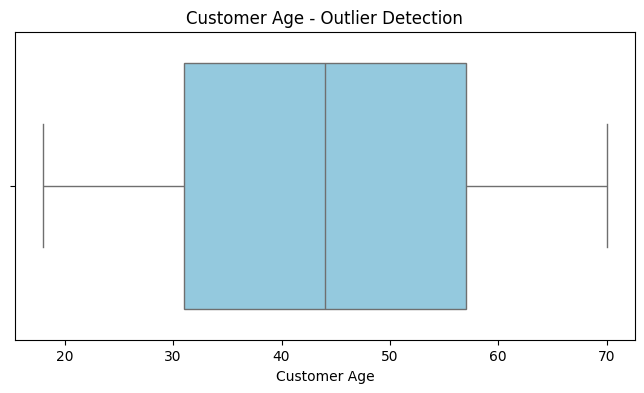

In [29]:


plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Customer Age'], color='skyblue')
plt.title('Customer Age - Outlier Detection')
plt.show()



In [30]:
Q1 = df['Time to Resolution'].quantile(0.25)
Q3 = df['Time to Resolution'].quantile(0.75)
IQR = Q3 - Q1

time_outliers = df[(df['Time to Resolution'] < Q1 - 1.5 * IQR) | (df['Time to Resolution'] > Q3 + 1.5 * IQR)]
print(f"Number of time outliers: {len(time_outliers)}")


Number of time outliers: 2768


In [31]:
df1

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [32]:
df1['Time to Resolution'] = pd.to_datetime(df1['Time to Resolution'],errors = 'coerce')

In [33]:
Q1 = df1['Time to Resolution'].quantile(0.25)
Q3 = df1['Time to Resolution'].quantile(0.75)
IQR = Q3 - Q1

time_outliers = df1[(df1['Time to Resolution'] < Q1 - 1.5 * IQR) | (df1['Time to Resolution'] > Q3 + 1.5 * IQR)]
print(f"Number of time outliers: {len(time_outliers)}")


Number of time outliers: 0


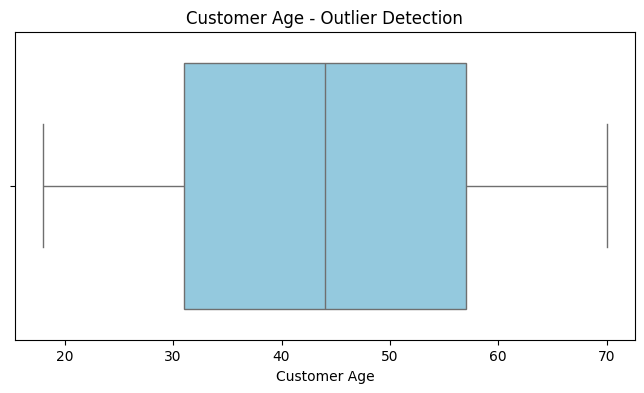

In [34]:


plt.figure(figsize=(8, 4))
sns.boxplot(x=df1['Customer Age'], color='skyblue')
plt.title('Customer Age - Outlier Detection')
plt.show()



#  Feature Engineering Questions

### How can we create a feature representing Response Delay (First Response Time - Date of Purchase)?

In [35]:
df['Response Delay'] = df['First Response Time'] - df['Date of Purchase']
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Response Delay
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Pending Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,3.0,801 days 12:15:36
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Pending Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,3.0,740 days 16:45:38
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,1052 days 11:14:38
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,930 days 07:29:40
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,1213 days 00:12:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Pending Resolution,Low,Phone,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,540 days 11:22:02
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Pending Resolution,Critical,Email,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,1195 days 11:22:02
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,653 days 09:44:22
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,593 days 18:28:24


In [36]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder



# Select the column to encode
ticket_status = df[['Ticket Status']]

# Initialize the OneHotEncoder with drop='first'
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the column
encoded_array = encoder.fit_transform(ticket_status)

# Get the feature names for encoded columns
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Ticket Status']))

# Concatenate with original DataFrame (dropping the original column)
df = pd.concat([df.drop('Ticket Status', axis=1), encoded_df], axis=1)
df


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Response Delay,Ticket Status_Open,Ticket Status_Pending Customer Response
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,3.0,801 days 12:15:36,0.0,1.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,3.0,740 days 16:45:38,0.0,1.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,1052 days 11:14:38,0.0,0.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,930 days 07:29:40,0.0,0.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,1213 days 00:12:42,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Pending Resolution,Low,Phone,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,540 days 11:22:02,1.0,0.0
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Email,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,1195 days 11:22:02,1.0,0.0
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,653 days 09:44:22,0.0,0.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,593 days 18:28:24,0.0,0.0


In [37]:
# Day of the week (0 = Monday, 6 = Sunday)
df['Response Weekday'] = df['First Response Time'].dt.weekday

# Weekend flag
df['Is Weekend'] = df['Response Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Hour of day (e.g., 0–23)
df['Response Hour'] = df['First Response Time'].dt.hour

# Part of day (optional custom bucket)
def get_day_part(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Response Time of Day'] = df['Response Hour'].apply(get_day_part)
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,First Response Time,Time to Resolution,Customer Satisfaction Rating,Response Delay,Ticket Status_Open,Ticket Status_Pending Customer Response,Response Weekday,Is Weekend,Response Hour,Response Time of Day
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,2023-06-01 12:15:36,2023-06-01 11:17:48,3.0,801 days 12:15:36,0.0,1.0,3,0,12,Afternoon
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,2023-06-01 16:45:38,2023-06-01 11:17:48,3.0,740 days 16:45:38,0.0,1.0,3,0,16,Afternoon
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,1052 days 11:14:38,0.0,0.0,3,0,11,Morning
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,930 days 07:29:40,0.0,0.0,3,0,7,Morning
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,1213 days 00:12:42,0.0,0.0,3,0,0,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,...,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,540 days 11:22:02,1.0,0.0,3,0,11,Morning
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,...,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,1195 days 11:22:02,1.0,0.0,3,0,11,Morning
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,...,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,653 days 09:44:22,0.0,0.0,3,0,9,Morning
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,...,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,593 days 18:28:24,0.0,0.0,3,0,18,Evening


### How can we bucket Customer Age into groups (Young, Middle-Aged, Senior)?

In [38]:
def age(data):
    if data >60:
        return 'senior'
    elif 30<data<=60:
        return 'middle age'
    elif 0<data<=30:
        return 'young'
df['customer agr group'] = df['Customer Age'].apply(age)
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,Time to Resolution,Customer Satisfaction Rating,Response Delay,Ticket Status_Open,Ticket Status_Pending Customer Response,Response Weekday,Is Weekend,Response Hour,Response Time of Day,customer agr group
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,2023-06-01 11:17:48,3.0,801 days 12:15:36,0.0,1.0,3,0,12,Afternoon,middle age
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,2023-06-01 11:17:48,3.0,740 days 16:45:38,0.0,1.0,3,0,16,Afternoon,middle age
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,2023-06-01 18:05:38,3.0,1052 days 11:14:38,0.0,0.0,3,0,11,Morning,middle age
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,2023-06-01 01:57:40,3.0,930 days 07:29:40,0.0,0.0,3,0,7,Morning,young
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,2023-06-01 19:53:42,1.0,1213 days 00:12:42,0.0,0.0,3,0,0,Night,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,...,2023-06-01 11:17:48,3.0,540 days 11:22:02,1.0,0.0,3,0,11,Morning,young
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,...,2023-06-01 11:17:48,3.0,1195 days 11:22:02,1.0,0.0,3,0,11,Morning,young
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,...,2023-06-01 04:31:22,3.0,653 days 09:44:22,0.0,0.0,3,0,9,Morning,middle age
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,...,2023-06-01 05:32:24,3.0,593 days 18:28:24,0.0,0.0,3,0,18,Evening,middle age


In [42]:
laptops_computers = ['Dell XPS','Microsoft Surface','Lenovo ThinkPad','HP Pavilion','MacBook Pro','Asus ROG']

smartphones_tablets = ['Google Pixel','iPhone','Samsung Galaxy','Sony Xperia','Amazon Kindle']

gaming = ['Nintendo Switch','Microsoft Xbox Controller','Nintendo Switch Pro Controller','Sony PlayStation','Xbox','PlayStation']

smart_home_assistants = ['Google Nest','Amazon Echo','Nest Thermostat','Philips Hue Lights','Roomba Robot Vacuum','LG Smart TV','Sony 4K HDR TV','LG OLED','Samsung Soundbar','LG Washing Machine']

cameras_photography = ['GoPro Hero','GoPro Action Camera','Canon EOS','Canon DSLR Camera','Nikon D']

audio_wearables = [
    'Bose QuietComfort',
    'Bose SoundLink Speaker',
    'Apple AirPods',
    'Fitbit Versa Smartwatch',
    'Fitbit Charge',
    'Garmin Forerunner'
]

software = [
    'Microsoft Office',
    'Adobe Photoshop',
    'Autodesk AutoCAD'
]

appliances = [
    'Dyson Vacuum Cleaner'
]

def product_categoris(data):
    if data in laptops_computers:
        return "laptops_computers"
    elif data in appliances:
        return "appliances"
    elif data in software:
        return "software"
    elif data in audio_wearables:
        return "audio_wearables"
    elif data in cameras_photography:
        return "cameras_photography"
    elif data in smart_home_assistants:
        return "smart_home_assistants"
    elif data in gaming:
        return "gaming"
    else:
        return 0
df['sub-category'] = df['Product Purchased'].apply(product_categoris)
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Response Delay,Ticket Status_Open,Ticket Status_Pending Customer Response,Response Weekday,Is Weekend,Response Hour,Response Time of Day,customer agr group,sub-category
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,3.0,801 days 12:15:36,0.0,1.0,3,0,12,Afternoon,middle age,cameras_photography
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,3.0,740 days 16:45:38,0.0,1.0,3,0,16,Afternoon,middle age,smart_home_assistants
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,1052 days 11:14:38,0.0,0.0,3,0,11,Morning,middle age,laptops_computers
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,930 days 07:29:40,0.0,0.0,3,0,7,Morning,young,software
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,1213 days 00:12:42,0.0,0.0,3,0,0,Night,senior,software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Pending Resolution,Low,Phone,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,540 days 11:22:02,1.0,0.0,3,0,11,Morning,young,smart_home_assistants
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Email,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,1195 days 11:22:02,1.0,0.0,3,0,11,Morning,young,audio_wearables
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,653 days 09:44:22,0.0,0.0,3,0,9,Morning,middle age,cameras_photography
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,593 days 18:28:24,0.0,0.0,3,0,18,Evening,middle age,gaming


In [43]:

# Initialize encoder (updated argument)
encoder = OneHotEncoder(drop = 'first',sparse_output=False)

# Fit and transform
encoded_array = encoder.fit_transform(df[['Customer Gender']])

# Create new DataFrame with column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Customer Gender']))

# Concatenate with original (optional: drop original column)
df = pd.concat([df.drop('Customer Gender', axis=1), encoded_df], axis=1)

# Print result
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Response Delay,Ticket Status_Open,Ticket Status_Pending Customer Response,Response Weekday,Is Weekend,Response Hour,Response Time of Day,customer agr group,sub-category,Customer Gender_Male,Customer Gender_Other
0,1,Marisa Obrien,carrollallison@example.com,32,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,3.0,801 days 12:15:36,0.0,1.0,3,0,12,Afternoon,middle age,cameras_photography,0.0,1.0
1,2,Jessica Rios,clarkeashley@example.com,42,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,3.0,740 days 16:45:38,0.0,1.0,3,0,16,Afternoon,middle age,smart_home_assistants,0.0,0.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,1052 days 11:14:38,0.0,0.0,3,0,11,Morning,middle age,laptops_computers,0.0,1.0
3,4,Christina Dillon,bradleyolson@example.org,27,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,930 days 07:29:40,0.0,0.0,3,0,7,Morning,young,software,0.0,0.0
4,5,Alexander Carroll,bradleymark@example.com,67,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,1213 days 00:12:42,0.0,0.0,3,0,0,Night,senior,software,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Pending Resolution,Low,Phone,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,540 days 11:22:02,1.0,0.0,3,0,11,Morning,young,smart_home_assistants,0.0,0.0
8465,8466,Lori Davis,russell68@example.com,27,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Email,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,1195 days 11:22:02,1.0,0.0,3,0,11,Morning,young,audio_wearables,0.0,0.0
8466,8467,Michelle Kelley,ashley83@example.org,57,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,653 days 09:44:22,0.0,0.0,3,0,9,Morning,middle age,cameras_photography,0.0,0.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,593 days 18:28:24,0.0,0.0,3,0,18,Evening,middle age,gaming,1.0,0.0


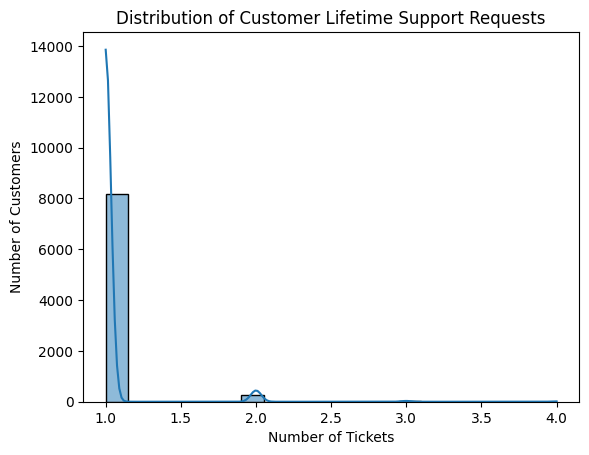

In [44]:
# Step 1: Count total tickets per customer
lifetime_requests = (
    df.groupby('Customer Email')  # or 'Customer Name' if emails are missing/duplicated
      .size()
      .reset_index(name='Lifetime Support Requests')
)

# Step 2: Merge back into original dataframe
df = df.merge(lifetime_requests, on='Customer Email', how='left')
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Lifetime Support Requests'], bins=20, kde=True)
plt.title('Distribution of Customer Lifetime Support Requests')
plt.xlabel('Number of Tickets')
plt.ylabel('Number of Customers')
plt.show()


C:\Users\ACER PC\AppData\Local\Temp\ipykernel_12656\1857524305.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Closure Probability', y='Ticket Type', data=closure_rate, palette='viridis')


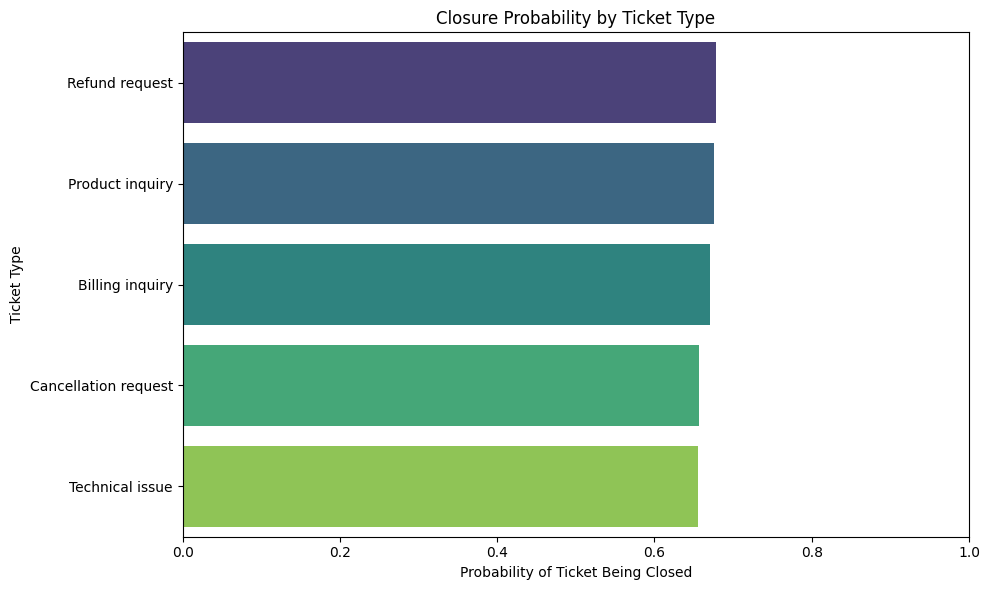

,Ticket Type,Closure Probability
3,Refund request,0.678082
2,Product inquiry,0.675807
0,Billing inquiry,0.670135
1,Cancellation request,0.656637
4,Technical issue,0.655409


In [46]:
df['Is Closed'] = df['Ticket Status_Open'].apply(lambda x: 0 if x == 1 else 1)

closure_rate = (
    df.groupby('Ticket Type')['Is Closed']
    .mean()
    .reset_index()
    .rename(columns={'Is Closed': 'Closure Probability'})
    .sort_values(by='Closure Probability', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(x='Closure Probability', y='Ticket Type', data=closure_rate, palette='viridis')
plt.title('Closure Probability by Ticket Type')
plt.xlabel('Probability of Ticket Being Closed')
plt.ylabel('Ticket Type')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()
closure_rate

### Can we group tickets by Customer Email to analyze repeat complaints?

In [48]:
repeat_issues = (
    df.groupby(['Customer Email', 'Ticket Type'])
      .size()
      .reset_index(name='Ticket Count')
      .sort_values(by='Ticket Count', ascending=False)
)

In [49]:
repeat_issues

,Customer Email,Ticket Type,Ticket Count
480,asmith@example.com,Billing inquiry,3
482,asmith@example.org,Refund request,3
6129,qking@example.org,Refund request,2
1280,christopher29@example.net,Cancellation request,2
1673,david25@example.org,Technical issue,2
...,...,...,...
2812,heather44@example.com,Product inquiry,1
2811,heather30@example.net,Technical issue,1
2810,heather27@example.org,Product inquiry,1
2809,heather15@example.net,Billing inquiry,1


### How can we engineer a Customer Satisfaction Prediction Score?

Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.01      0.02       224
           1       0.87      0.99      0.93      1470

    accuracy                           0.86      1694
   macro avg       0.50      0.50      0.47      1694
weighted avg       0.77      0.86      0.81      1694

ROC AUC Score: 0.6601509353741496


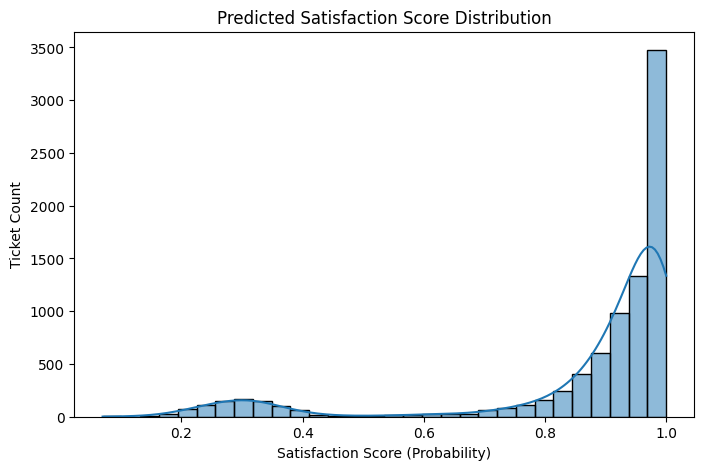

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure timedelta is converted to hours
df['Response Delay'] = pd.to_timedelta(df['Response Delay'], errors='coerce')
df['Response Delay (hours)'] = df['Response Delay'].dt.total_seconds() / 3600

# Create binary target variable
df['Is Satisfied'] = (df['Customer Satisfaction Rating'] >= 3).astype(int)

# Final feature list (corrected)
features = [
    'Ticket Type', 'Ticket Priority', 'Ticket Channel', 'Is Weekend',
    'Response Hour', 'Customer Age', 'Response Delay (hours)', 'Lifetime Support Requests',
]

# One-hot encoding for categorical variables
df_model = pd.get_dummies(df[features], drop_first=True)

# Define X and y
X = df_model
y = df['Is Satisfied']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Predict for full dataset
df['Satisfaction Prediction Score'] = model.predict_proba(df_model)[:, 1]

# Satisfaction Tiers
df['Satisfaction Tier'] = pd.cut(df['Satisfaction Prediction Score'],
    bins=[0, 0.4, 0.7, 1.0],
    labels=['Low', 'Medium', 'High']
)

# Plotting
plt.figure(figsize=(8, 5))
sns.histplot(df['Satisfaction Prediction Score'], kde=True, bins=30)
plt.title("Predicted Satisfaction Score Distribution")
plt.xlabel("Satisfaction Score (Probability)")
plt.ylabel("Ticket Count")
plt.show()


In [52]:
df['Satisfaction Prediction Score'] = model.predict_proba(X)[:, 1]  # Probability of 'Satisfied'

# MACHINE LEARNING 

In [57]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Product Purchased', 'Date of Purchase', 'Ticket Type',
       'Ticket Subject', 'Ticket Description', 'Resolution', 'Ticket Priority',
       'Ticket Channel', 'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Response Delay', 'Ticket Status_Open',
       'Ticket Status_Pending Customer Response', 'Response Weekday',
       'Is Weekend', 'Response Hour', 'Response Time of Day',
       'customer agr group', 'sub-category', 'Customer Gender_Male',
       'Customer Gender_Other', 'Lifetime Support Requests', 'Is Closed',
       'Response Delay (hours)', 'Is Satisfied',
       'Satisfaction Prediction Score', 'Satisfaction Tier'],
      dtype='object')

### Can we predict whether a ticket will be resolved or remain open?

In [60]:
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Response Delay,Ticket Status_Open,Ticket Status_Pending Customer Response,Response Weekday,Is Weekend,Response Hour,Response Time of Day,customer agr group,sub-category,Customer Gender_Male,Customer Gender_Other,Lifetime Support Requests,Is Closed,Response Delay (hours),Is Satisfied,Satisfaction Prediction Score,Satisfaction Tier
0,1,Marisa Obrien,carrollallison@example.com,32,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,3.0,801 days 12:15:36,0.0,1.0,3,0,12,Afternoon,middle age,cameras_photography,0.0,1.0,1,1,19236.260000,1,0.96,High
1,2,Jessica Rios,clarkeashley@example.com,42,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,3.0,740 days 16:45:38,0.0,1.0,3,0,16,Afternoon,middle age,smart_home_assistants,0.0,0.0,1,1,17776.760556,1,1.00,High
2,3,Christopher Robbins,gonzalestracy@example.com,48,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,1052 days 11:14:38,0.0,0.0,3,0,11,Morning,middle age,laptops_computers,0.0,1.0,1,1,25259.243889,1,1.00,High
3,4,Christina Dillon,bradleyolson@example.org,27,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,930 days 07:29:40,0.0,0.0,3,0,7,Morning,young,software,0.0,0.0,1,1,22327.494444,1,0.98,High
4,5,Alexander Carroll,bradleymark@example.com,67,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,1213 days 00:12:42,0.0,0.0,3,0,0,Night,senior,software,0.0,0.0,1,1,29112.211667,0,0.35,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Pending Resolution,Low,Phone,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,540 days 11:22:02,1.0,0.0,3,0,11,Morning,young,smart_home_assistants,0.0,0.0,1,0,12971.367222,1,0.93,High
8465,8466,Lori Davis,russell68@example.com,27,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Email,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,1195 days 11:22:02,1.0,0.0,3,0,11,Morning,young,audio_wearables,0.0,0.0,1,0,28691.367222,1,0.93,High
8466,8467,Michelle Kelley,ashley83@example.org,57,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,653 days 09:44:22,0.0,0.0,3,0,9,Morning,middle age,cameras_photography,0.0,0.0,1,1,15681.739444,1,0.89,High
8467,8468,Steven Rodriguez,fpowell@example.org,54,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,593 days 18:28:24,0.0,0.0,3,0,18,Evening,middle age,gaming,1.0,0.0,1,1,14250.473333,1,0.83,High


In [62]:
# Target: 1 if ticket is resolved (not open or pending customer), 0 otherwise
df['Will Resolve'] = 1 - ((df['Ticket Status_Open'] == 1) | (df['Ticket Status_Pending Customer Response'] == 1)).astype(int)
features_resolve = [
    'Ticket Type', 'Ticket Priority', 'Ticket Channel', 'Is Weekend',
    'Response Hour', 'Customer Age', 'Response Delay (hours)', 'Lifetime Support Requests'
]
df_resolve = pd.get_dummies(df[features_resolve], drop_first=True)


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df_resolve
y = df['Will Resolve']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_resolve = RandomForestClassifier(random_state=42)
model_resolve.fit(X_train, y_train)

y_pred_resolve = model_resolve.predict(X_test)
print(classification_report(y_test, y_pred_resolve))


              precision    recall  f1-score   support

           0       0.72      0.82      0.77      1120
           1       0.51      0.36      0.42       574

    accuracy                           0.67      1694
   macro avg       0.61      0.59      0.59      1694
weighted avg       0.65      0.67      0.65      1694



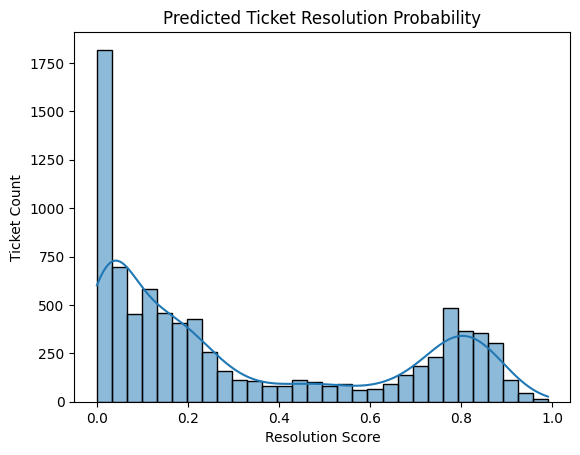

In [64]:
df['Resolution Probability'] = model_resolve.predict_proba(df_resolve)[:, 1]

sns.histplot(df['Resolution Probability'], bins=30, kde=True)
plt.title("Predicted Ticket Resolution Probability")
plt.xlabel("Resolution Score")
plt.ylabel("Ticket Count")
plt.show()


In [66]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Product Purchased', 'Date of Purchase', 'Ticket Type',
       'Ticket Subject', 'Ticket Description', 'Resolution', 'Ticket Priority',
       'Ticket Channel', 'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Response Delay', 'Ticket Status_Open',
       'Ticket Status_Pending Customer Response', 'Response Weekday',
       'Is Weekend', 'Response Hour', 'Response Time of Day',
       'customer agr group', 'sub-category', 'Customer Gender_Male',
       'Customer Gender_Other', 'Lifetime Support Requests', 'Is Closed',
       'Response Delay (hours)', 'Is Satisfied',
       'Satisfaction Prediction Score', 'Satisfaction Tier', 'Will Resolve',
       'Resolution Probability'],
      dtype='object')

In [68]:
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Response Delay,Ticket Status_Open,Ticket Status_Pending Customer Response,Response Weekday,Is Weekend,Response Hour,Response Time of Day,customer agr group,sub-category,Customer Gender_Male,Customer Gender_Other,Lifetime Support Requests,Is Closed,Response Delay (hours),Is Satisfied,Satisfaction Prediction Score,Satisfaction Tier,Will Resolve,Resolution Probability
0,1,Marisa Obrien,carrollallison@example.com,32,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Social media,2023-06-01 12:15:36,2023-06-01 11:17:48,3.0,801 days 12:15:36,0.0,1.0,3,0,12,Afternoon,middle age,cameras_photography,0.0,1.0,1,1,19236.260000,1,0.96,High,0,0.10
1,2,Jessica Rios,clarkeashley@example.com,42,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Chat,2023-06-01 16:45:38,2023-06-01 11:17:48,3.0,740 days 16:45:38,0.0,1.0,3,0,16,Afternoon,middle age,smart_home_assistants,0.0,0.0,1,1,17776.760556,1,1.00,High,0,0.19
2,3,Christopher Robbins,gonzalestracy@example.com,48,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,1052 days 11:14:38,0.0,0.0,3,0,11,Morning,middle age,laptops_computers,0.0,1.0,1,1,25259.243889,1,1.00,High,1,0.67
3,4,Christina Dillon,bradleyolson@example.org,27,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,930 days 07:29:40,0.0,0.0,3,0,7,Morning,young,software,0.0,0.0,1,1,22327.494444,1,0.98,High,1,0.85
4,5,Alexander Carroll,bradleymark@example.com,67,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,1213 days 00:12:42,0.0,0.0,3,0,0,Night,senior,software,0.0,0.0,1,1,29112.211667,0,0.35,Low,1,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Pending Resolution,Low,Phone,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,540 days 11:22:02,1.0,0.0,3,0,11,Morning,young,smart_home_assistants,0.0,0.0,1,0,12971.367222,1,0.93,High,0,0.03
8465,8466,Lori Davis,russell68@example.com,27,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Pending Resolution,Critical,Email,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0,1195 days 11:22:02,1.0,0.0,3,0,11,Morning,young,audio_wearables,0.0,0.0,1,0,28691.367222,1,0.93,High,0,0.13
8466,8467,Michelle Kelley,ashley83@example.org,57,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,653 days 09:44:22,0.0,0.0,3,0,9,Morning,middle age,cameras_photography,0.0,0.0,1,1,15681.739444,1,0.89,High,1,0.68
8467,8468,Steven Rodriguez,fpowell@example.org,54,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,593 days 18:28:24,0.0,0.0,3,0,18,Evening,middle age,gaming,1.0,0.0,1,1,14250.473333,1,0.83,High,1,0.33


### How well can a model predict the First Response Time?